In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


data = load_breast_cancer()
X = data.data
y = data.target 
print (data.feature_names)
# print(data)

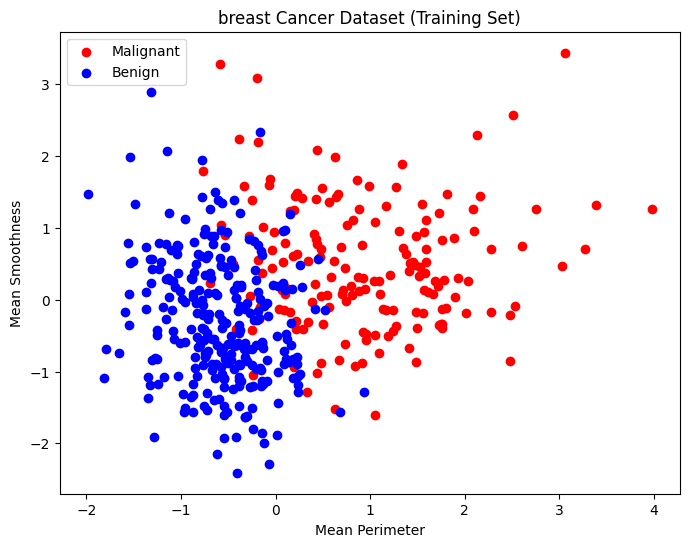

In [9]:
X= data.data[:,[2,4]]
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_bias = np.hstack((X, np.ones((X.shape[0],1))))

X_train, X_val, y_train, y_val = train_test_split(X_bias, y, test_size=0.2,random_state=42, stratify=y)

plt.figure(figsize=[8,6])
plt.scatter(X_train[y_train == 0, 0], X_train[y_train==0, 1], color="r",label = "Malignant")
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],color = "b", label = "Benign")
plt.xlabel("Mean Perimeter")
plt.ylabel("Mean Smoothness")
plt.title("breast Cancer Dataset (Training Set)")
plt.legend()
plt.show()

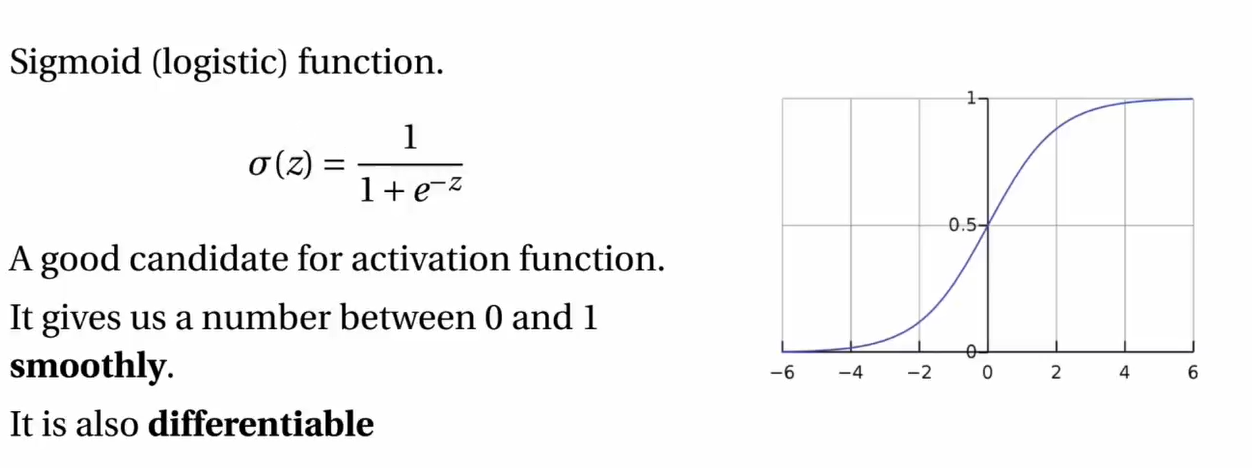

In [10]:
def sigmoid(z):
    return 1 / (np.exp(-z))

def compute_loss(w,X,y):
    z = X @ w
    # applying the sigmoid function to get predicted porbobilities
    predictions = sigmoid(z)
    # binary cross-entropy loos
    loss = -np.mean(y *np.log(predictions)+(1 - y) * np.log(1-predictions))
    return loss

def compute_gradient(w, X, y):
    z = X @ w
    predictions = sigmoid (z)
    # error = difference between predictied and ture labels
    errors = predictions - y
    # compute the gradient of the loss function
    gradient = X.T @ errors / len (y)
    return gradient

def validation_accuracy (w, X_val, y_val):
    probabilities = sigmoid(X_val @ w)
    predictions  = (probabilities > 0.5).astype(int) #decission rule for binary classification
    accuracy = np.mean(predictions == y_val)
    return accuracy

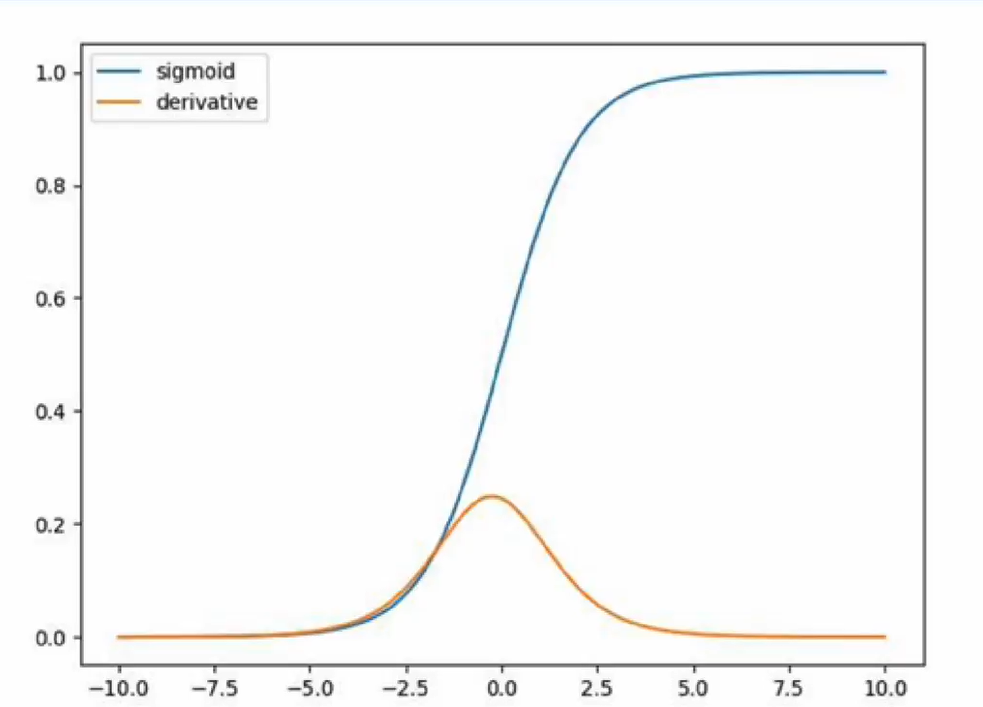

In [12]:
def gradient_descent_logestic(x_train, y_train,
                               x_val, y_val, learning_rate= 0.1, 
                               n_steps = 1000, tolerance= 1e-6):
    w = np.zeros(X_train.shape[1]) #start with all weights equal to 0
    loss_history = [compute_loss(w, X_train, y_train)]
    validation_accuracy_history = [validation_accuracy(w, X_val, y_val)]
    weights_history = [w.copy()] #storing weights for decision boundary plotting

    for step in range(1, n_steps + 1):
        grad = compute_gradient(w, X_train, y_train)
        w -= learning_rate * grad #update rule
        loss = compute_loss(w, X_train, y_train)
        loss_history.append(loss)

        #compute validation accuracy 
        acc = validation_accuracy(w , X_val, y_val)
        validation_accuracy_history.append(acc)

        #storing weights every 10 steps for plotting
        if step % 10 == 0:
            weights_history.append(w.copy())

        # check convergence
        if np.abs(loss_history[-2]-loss_history[-1]) < tolerance:
            print (f"Converged at step {step}")
            break
        if step % 100 == 0:
            print(f"Step {step}: Loss = {loss :.4f}, Validation Accuracy = {acc:.4f}")
    return w, loss_history, validation_accuracy_history, weights_history

In [13]:
learning_rate = 0.05
n_steps = 800

w_opt, loss_history, val_accuracy_history, weights_history = gradient_descent_logestic(
    X_train, y_train, X_val, y_val,
    learning_rate=learning_rate,
    n_steps= n_steps
)
print(f'Optimized weights: {w_opt}')
print(f"Decision rule:{w_opt[0]} * Mean Perimeter + {w_opt[1]} * Mean Smoothness + {w_opt[2]} > 0 : Benign")
print(f"Decision rule:{w_opt[0]} * Mean Perimeter + {w_opt[1]} * Mean Smoothness + {w_opt[2]} < 0 : Malignant")

C:\Users\ali_a\AppData\Local\Temp\ipykernel_4404\2301895573.py:9: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y *np.log(predictions)+(1 - y) * np.log(1-predictions))
C:\Users\ali_a\AppData\Local\Temp\ipykernel_4404\2301895573.py:9: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y *np.log(predictions)+(1 - y) * np.log(1-predictions))
C:\Users\ali_a\AppData\Local\Temp\ipykernel_4404\2301895573.py:9: RuntimeWarning: invalid value encountered in log
  loss = -np.mean(y *np.log(predictions)+(1 - y) * np.log(1-predictions))


Step 100: Loss = nan, Validation Accuracy = 0.8860
Step 200: Loss = nan, Validation Accuracy = 0.8333
Step 300: Loss = nan, Validation Accuracy = 0.8158
Step 400: Loss = nan, Validation Accuracy = 0.8070
Step 500: Loss = nan, Validation Accuracy = 0.8070
Step 600: Loss = nan, Validation Accuracy = 0.8158
Step 700: Loss = nan, Validation Accuracy = 0.8158
Step 800: Loss = nan, Validation Accuracy = 0.8158
Optimized weights: [-0.82786981 -0.24800309 -0.79588918]
Decision rule:-0.8278698054135865 * Mean Perimeter + -0.24800308976445176 * Mean Smoothness + -0.7958891839865636 > 0 : Benign
Decision rule:-0.8278698054135865 * Mean Perimeter + -0.24800308976445176 * Mean Smoothness + -0.7958891839865636 < 0 : Malignant


In [ ]:
def plot_decision_boundary(w, X, y, step, total_steps):
    x_values  = np.array ([X[:,0].min()-1, X[:,1].max()+1])
    if w[1] != 0:
        y_values = -(w[0] * x_values + w[2]) / w[1]
        plt.plot(x_values, y_values, color= "o", alpha = (0.20+(step / total_steps)))
    else:
        plt.axvline(x= -w[2] / w[0], color= "o")
    plt.legend()
    
def plot_decision_boundaries(weights_history, X, y, total_steps):
    plt.figure(figsize=(8,6))
    plt.scatter(X[y == 0 , 0],X[y == 0 , 1], color = "r", label = "Malignant")
    plt.scatter(X[y == 1 , 1],X[y == 1 , 1], color = "b", label = "Benign")
    plt.xlim(-2.5,3)
    plt.ylim(-3,3)
    for i, w in enumerate(weights_history):
        step= i * 10
        plot_decision_boundary(w, X, y, step, total_steps)
    plt.title('Decision Boundaries during Gradient Descent')
    plt.show()

plot_decision_boundaries(weights_history, X_train[:, :2], y_train, n_steps)
